In [1]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import nltk_utils

[nltk_data] Downloading package punkt to C:\Users\User/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Exploration

In [4]:
# import data
df= pd.read_csv('Symptom2Disease.csv')
df.head()

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1200 non-null   int64 
 1   label       1200 non-null   object
 2   text        1200 non-null   object
dtypes: int64(1), object(2)
memory usage: 28.3+ KB


In [6]:
# Check for data classes
df['label'].nunique()

24

In [7]:
a= [df['label'].unique()]
print(a)

[array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)]


In [8]:
# sort target data
target=['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes']
real_target= sorted(target)

In [9]:
real_target

['Acne',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Common Cold',
 'Dengue',
 'Dimorphic Hemorrhoids',
 'Fungal infection',
 'Hypertension',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Pneumonia',
 'Psoriasis',
 'Typhoid',
 'Varicose Veins',
 'allergy',
 'diabetes',
 'drug reaction',
 'gastroesophageal reflux disease',
 'peptic ulcer disease',
 'urinary tract infection']

In [10]:
target_dict= {i:j for i,j in enumerate(sorted(target))}
target_dict

{0: 'Acne',
 1: 'Arthritis',
 2: 'Bronchial Asthma',
 3: 'Cervical spondylosis',
 4: 'Chicken pox',
 5: 'Common Cold',
 6: 'Dengue',
 7: 'Dimorphic Hemorrhoids',
 8: 'Fungal infection',
 9: 'Hypertension',
 10: 'Impetigo',
 11: 'Jaundice',
 12: 'Malaria',
 13: 'Migraine',
 14: 'Pneumonia',
 15: 'Psoriasis',
 16: 'Typhoid',
 17: 'Varicose Veins',
 18: 'allergy',
 19: 'diabetes',
 20: 'drug reaction',
 21: 'gastroesophageal reflux disease',
 22: 'peptic ulcer disease',
 23: 'urinary tract infection'}

In [11]:
df['label']= df['label'].replace({j:i for i,j in enumerate(sorted(target))})

C:\Users\User\AppData\Local\Temp\ipykernel_5100\4057475892.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label']= df['label'].replace({j:i for i,j in enumerate(sorted(target))})


In [12]:
df.head()

,Unnamed: 0,label,text
0,0,15,I have been experiencing a skin rash on my arm...
1,1,15,"My skin has been peeling, especially on my kne..."
2,2,15,I have been experiencing joint pain in my fing...
3,3,15,"There is a silver like dusting on my skin, esp..."
4,4,15,"My nails have small dents or pits in them, and..."


In [13]:
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [14]:
df.duplicated().sum()

47

In [15]:
df[df.duplicated]

,label,text
163,4,I'm feeling fatigued and have no energy. I can...
387,5,I've been quite exhausted and ill. My throat h...
430,14,"I have a really high fever, and I have problem..."
433,14,I'm having a hard time breathing and I feel re...
438,14,"Lately I've been experiencing chills, fatigue,..."
469,7,I've been constipated and it's really hard to ...
470,7,"Since I've been constipated, using the restroo..."
471,7,I've been constipated and it's really hard to ...
487,7,Lately I've been experiencing constipation and...
489,7,I've recently been suffering from constipation...


In [16]:
df.drop_duplicates(inplace= True)

In [17]:
df['label'].value_counts()

label
15    50
17    50
22    50
20    50
18    50
23    50
9     50
19    50
8     50
6     50
10    50
16    50
5     49
3     49
4     49
2     49
21    48
14    47
13    47
1     46
0     46
12    44
7     41
11    38
Name: count, dtype: int64

In [18]:
train_data, test_data= train_test_split(df, test_size=0.15, random_state=42 )

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 618 to 1173
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   980 non-null    int64 
 1   text    980 non-null    object
dtypes: int64(1), object(1)
memory usage: 23.0+ KB


In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 794 to 139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   173 non-null    int64 
 1   text    173 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


In [21]:
train_data['label'].value_counts().sort_index()

label
0     37
1     41
2     41
3     40
4     44
5     42
6     41
7     32
8     40
9     43
10    45
11    32
12    40
13    41
14    37
15    45
16    41
17    41
18    40
19    46
20    44
21    38
22    45
23    44
Name: count, dtype: int64

In [22]:
test_data['label'].value_counts().sort_index()

label
0      9
1      5
2      8
3      9
4      5
5      7
6      9
7      9
8     10
9      7
10     5
11     6
12     4
13     6
14    10
15     5
16     9
17     9
18    10
19     4
20     6
21    10
22     5
23     6
Name: count, dtype: int64

## Prepare data for training

- Convert Text to TF-IDF Vectors
- Convert Vectors to Pytorch Tensors
- Convert tensors to pytorch dataloaders

## Convert text to vectors

In [26]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

print("NLTK data paths:", nltk.data.path)

try:
    print(word_tokenize("This is a test."))
except LookupError as e:
    print("LookupError:", e)



[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


NLTK data paths: ['C:\\Users\\User/nltk_data', 'C:\\Users\\User\\anaconda3\\nltk_data', 'C:\\Users\\User\\anaconda3\\share\\nltk_data', 'C:\\Users\\User\\anaconda3\\lib\\nltk_data', 'C:\\Users\\User\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']
['This', 'is', 'a', 'test', '.']


In [27]:
vectorizer= nltk_utils.vectorizer()

In [28]:
from nltk.tokenize import word_tokenize
print(word_tokenize("This is a test."))

['This', 'is', 'a', 'test', '.']


In [29]:
vectorizer.fit(train_data.text)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x000002BF93D37600>)

In [30]:
vectorizer.get_feature_names_out()[: 100]
vectorizer= vectorizer

In [31]:
vectorizer

TfidfVectorizer(stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x000002BF93D37600>)

In [32]:
data_input= vectorizer.transform(train_data.text)
test_data_input= vectorizer.transform(test_data.text)

In [33]:
data_input.shape, test_data_input.shape

((980, 1080), (173, 1080))

In [34]:
data_input[0]

<1x1080 sparse matrix of type '<class 'numpy.float64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [35]:
# Convert vectors to tensors
input_data_tensors= torch.tensor(data_input.toarray()).to(torch.float32)
test_data_tensors= torch.tensor(test_data_input.toarray()).to(torch.float32)

In [36]:
input_data_tensors.shape, input_data_tensors.dtype

(torch.Size([980, 1080]), torch.float32)

In [37]:
test_data_tensors.shape,test_data_tensors.dtype

(torch.Size([173, 1080]), torch.float32)

In [38]:
train_data_output= torch.tensor(train_data['label'].values)
test_data_output= torch.tensor(test_data['label'].values)

In [39]:
train_data_output.shape, test_data_output.shape

(torch.Size([980]), torch.Size([173]))

## Join input and target data together and create dataloaders

In [40]:
import preprocess_data
import model

In [41]:
train_dataset= preprocess_data.preprocess_data(input_data_tensors, train_data_output)
test_dataset= preprocess_data.preprocess_data(test_data_tensors, test_data_output)

In [42]:
train_dataset[0]

(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(2))

In [43]:
train_dataloader= preprocess_data.dataloader(dataset=train_dataset,
                                             batch_size=32, shuffle= True, num_workers=2)
test_dataloader= preprocess_data.dataloader(dataset=test_dataset,
                                             batch_size=32, shuffle= False, num_workers=2)

In [44]:
len(train_dataloader), len(test_dataloader)

(31, 6)

In [45]:
text, target= next(iter(train_dataloader))

In [46]:
text.shape, target.shape

(torch.Size([32, 1080]), torch.Size([32]))

In [47]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [48]:
model= model.RNN_model()

In [49]:
dummy_x= torch.rand(size= [1,1080])
dummy_x.shape

torch.Size([1, 1080])

In [50]:
model(dummy_x)

tensor([[-0.2972, -0.2018,  0.0044, -0.0620, -0.4298,  0.3009, -0.0595,  0.1077,
         -0.2000,  0.0791,  0.4263,  0.3037, -0.4049, -0.0341, -0.0521,  0.2491,
          0.2889,  0.1456, -0.1672,  0.5728,  0.1934, -0.7108,  0.5525, -0.2993]],
       grad_fn=<AddmmBackward0>)

# Train data

In [51]:
# Import metrics
from sklearn.metrics import accuracy_score, f1_score

In [52]:
# Import loss function and optimizers
from torch.nn.modules.loss import CrossEntropyLoss
loss_fn= CrossEntropyLoss()
optimizer= torch.optim.SGD(model.parameters(), lr= 0.1, weight_decay=0)

# Train Model

In [54]:
# epoch= 500

# results= {
#       "train_loss": [],
#       "train_accuracy": [],
#       "test_loss": [],
#       "test_accuracy": []
#       }

# for i in range(epoch):
#   train_loss=0
#   train_acc=0
#   for batch, (X, y) in enumerate(train_dataloader):
#     X, y= X.to(device), y.to(device)
#     # Train the model
#     model.train()

#     optimizer.zero_grad()

#     y_logits= model(X)

#     # Calculate the loss
#     loss= loss_fn(y_logits, y)
#     train_loss += loss

#     # ypreds
#     y_preds= torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
#     accuracy = accuracy_score(y, y_preds)
#     train_acc += accuracy

#     # zero grad
#     #optimizer.zero_grad()

#     # Loss backward
#     loss.backward()

#     # Optimizer step
#     optimizer.step()

#   train_loss /= len(train_dataloader)
#   train_acc /=len(train_dataloader)

#   test_loss = 0
#   test_acc=0
#   model.eval()
#   with torch.inference_mode():
#     for X, y in test_dataloader:
#       X, y= X.to(device), y.to(device)
#       y_logits= model(X)
#       loss= loss_fn(y_logits, y)
#       test_loss += loss
#       test_preds= torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
#       accuracy = accuracy_score(y, test_preds)
#       test_acc += accuracy
#     test_loss /= len(test_dataloader)
#     test_acc /= len(test_dataloader)

# results['train_loss'].append(train_loss.item())
# results['train_accuracy'].append(train_acc)
# results['test_loss'].append(test_loss.item())
# results['test_accuracy'].append(test_acc)

#   if i % 50 == 0:
#     print(f"\nTrain loss: {train_loss:.5f} | Train Acc: {train_acc:.5f} | Test loss: {test_loss:.5f} | Test Acc: {test_acc:.5f} |")


IndentationError: unexpected indent (206888055.py, line 63)

In [55]:
epoch = 500

results = {
    "train_loss": [],
    "train_accuracy": [],
    "test_loss": [],
    "test_accuracy": []
}

for i in range(epoch):
    train_loss = 0.0
    train_acc = 0.0
    model.train()
    
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        y_logits = model(X)
        
        # Calculate the loss and convert it to a float
        loss = loss_fn(y_logits, y)
        train_loss += loss.item()

        # Compute predictions and accuracy
        y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
        accuracy = accuracy_score(y.cpu(), y_preds.cpu())  # Ensure both are on CPU for sklearn
        train_acc += accuracy

        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    # Evaluation
    test_loss = 0.0
    test_acc = 0.0
    model.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            y_logits = model(X)
            loss = loss_fn(y_logits, y)
            test_loss += loss.item()

            test_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
            accuracy = accuracy_score(y.cpu(), test_preds.cpu())
            test_acc += accuracy

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    # Append metrics
    results['train_loss'].append(train_loss)
    results['train_accuracy'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_accuracy'].append(test_acc)

    # Logging every 50 epochs
    if i % 50 == 0:
        print(f"\nEpoch {i}: Train loss: {train_loss:.5f} | Train Acc: {train_acc:.5f} | Test loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}")



Epoch 0: Train loss: 3.16570 | Train Acc: 0.05222 | Test loss: 3.16601 | Test Acc: 0.02604

Epoch 50: Train loss: 0.62510 | Train Acc: 0.95907 | Test loss: 0.70810 | Test Acc: 0.87300

Epoch 100: Train loss: 0.09645 | Train Acc: 1.00000 | Test loss: 0.21916 | Test Acc: 0.98438

Epoch 150: Train loss: 0.03879 | Train Acc: 1.00000 | Test loss: 0.14880 | Test Acc: 0.97676

Epoch 200: Train loss: 0.02198 | Train Acc: 1.00000 | Test loss: 0.11468 | Test Acc: 0.98958

Epoch 250: Train loss: 0.01487 | Train Acc: 1.00000 | Test loss: 0.10546 | Test Acc: 0.99479

Epoch 300: Train loss: 0.01120 | Train Acc: 1.00000 | Test loss: 0.09787 | Test Acc: 0.99479

Epoch 350: Train loss: 0.00895 | Train Acc: 1.00000 | Test loss: 0.09448 | Test Acc: 0.99479

Epoch 400: Train loss: 0.00739 | Train Acc: 1.00000 | Test loss: 0.08534 | Test Acc: 0.99479

Epoch 450: Train loss: 0.00620 | Train Acc: 1.00000 | Test loss: 0.08432 | Test Acc: 0.99479


In [56]:
import matplotlib.pyplot as plt

# Plot Loss Curve

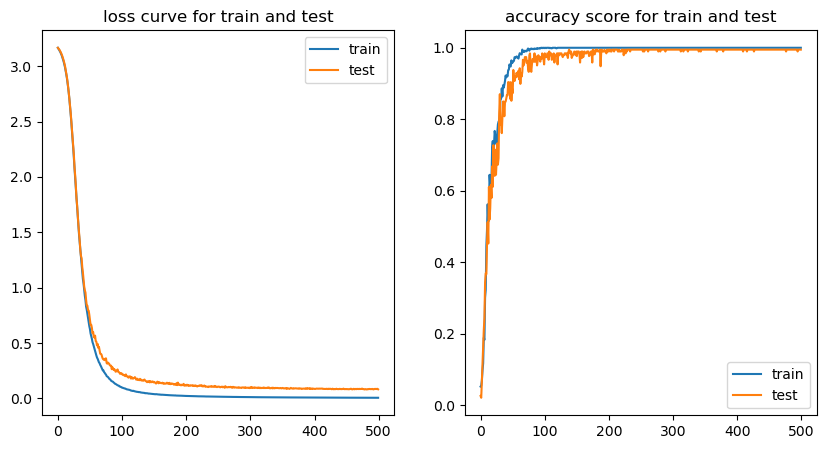

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(results['train_loss'], label= 'train')
plt.plot(results['test_loss'], label= 'test')
plt.title('loss curve for train and test')
plt.legend();
plt.subplot(1,2,2)
plt.plot(results['train_accuracy'], label= 'train')
plt.plot(results['test_accuracy'], label= 'test')
plt.title('accuracy score for train and test')
plt.legend();

# Evaluate Model With New Data

In [114]:
new_data= 'I have been having a backpain, what is the issue?'

In [115]:
transformed_new= vectorizer.transform([new_data])
transformed_new= torch.tensor(transformed_new.toarray()).to(torch.float32)
transformed_new.shape

torch.Size([1, 1080])

In [116]:
model.eval()
with torch.inference_mode():
  y_logits=model(transformed_new)
  test_preds= torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
  test_pred= target_dict[test_preds.item()]


In [117]:
print(f'based on your symptoms, I believe you are having {test_pred}')

based on your symptoms, I believe you are having Varicose Veins


# Save Model State Dict

In [95]:
from pathlib import Path

In [96]:
target_dir_path = Path('Models')
target_dir_path.mkdir(parents=True,
                      exist_ok=True)
model_path= target_dir_path / 'pretrained_symtom_to_disease_model.pth'
torch.save(obj=model.state_dict(),f= model_path)

In [97]:
target_dict

{0: 'Acne',
 1: 'Arthritis',
 2: 'Bronchial Asthma',
 3: 'Cervical spondylosis',
 4: 'Chicken pox',
 5: 'Common Cold',
 6: 'Dengue',
 7: 'Dimorphic Hemorrhoids',
 8: 'Fungal infection',
 9: 'Hypertension',
 10: 'Impetigo',
 11: 'Jaundice',
 12: 'Malaria',
 13: 'Migraine',
 14: 'Pneumonia',
 15: 'Psoriasis',
 16: 'Typhoid',
 17: 'Varicose Veins',
 18: 'allergy',
 19: 'diabetes',
 20: 'drug reaction',
 21: 'gastroesophageal reflux disease',
 22: 'peptic ulcer disease',
 23: 'urinary tract infection'}

# Deploy Model

In [119]:
# Import and class names setup
import gradio as gr
import os
import torch
import random
import nltk_utils
import pandas as pd
from sklearn.model_selection import train_test_split
import time

from model import RNN_model
from timeit import default_timer as timer
from typing import Tuple, Dict

# Import data
df= pd.read_csv('Symptom2Disease.csv')
df.drop('Unnamed: 0', axis= 1, inplace= True)

# Preprocess data
df.drop_duplicates(inplace= True)
train_data, test_data= train_test_split(df, test_size=0.15, random_state=42 )

# Setup class names
class_names= {0: 'Acne',
              1: 'Arthritis',
              2: 'Bronchial Asthma',
              3: 'Cervical spondylosis',
              4: 'Chicken pox',
              5: 'Common Cold',
              6: 'Dengue',
              7: 'Dimorphic Hemorrhoids',
              8: 'Fungal infection',
              9: 'Hypertension',
              10: 'Impetigo',
              11: 'Jaundice',
              12: 'Malaria',
              13: 'Migraine',
              14: 'Pneumonia',
              15: 'Psoriasis',
              16: 'Typhoid',
              17: 'Varicose Veins',
              18: 'allergy',
              19: 'diabetes',
              20: 'drug reaction',
              21: 'gastroesophageal reflux disease',
              22: 'peptic ulcer disease',
              23: 'urinary tract infection'
              }

vectorizer= nltk_utils.vectorizer()
vectorizer.fit(train_data.text)



# Model and transforms preparation
model= RNN_model()
# Load state dict
model.load_state_dict(torch.load(
    f= 'pretrained_symtom_to_disease_model.pth',
    map_location= torch.device('cpu')
    )
)
# Disease Advice
disease_advice = {
    'Acne': "Maintain a proper skincare routine, avoid excessive touching of the affected areas, and consider using over-the-counter topical treatments. If severe, consult a dermatologist.",
    'Arthritis': "Stay active with gentle exercises, manage weight, and consider pain-relief strategies like hot/cold therapy. Consult a rheumatologist for tailored guidance.",
    'Bronchial Asthma': "Follow prescribed inhaler and medication regimen, avoid triggers like smoke and allergens, and have an asthma action plan. Regular check-ups with a pulmonologist are important.",
    'Cervical spondylosis': "Maintain good posture, do neck exercises, and use ergonomic support. Physical therapy and pain management techniques might be helpful.",
    'Chicken pox': "Rest, maintain hygiene, and avoid scratching. Consult a doctor for appropriate antiviral treatment.",
    'Common Cold': "Get plenty of rest, stay hydrated, and consider over-the-counter remedies for symptom relief. Seek medical attention if symptoms worsen or last long.",
    'Dengue': "Stay hydrated, rest, and manage fever with acetaminophen. Seek medical care promptly, as dengue can escalate quickly.",
    'Dimorphic Hemorrhoids': "Follow a high-fiber diet, maintain good hygiene, and consider stool softeners. Consult a doctor if symptoms persist.",
    'Fungal infection': "Keep the affected area clean and dry, use antifungal creams, and avoid sharing personal items. Consult a dermatologist if it persists.",
    'Hypertension': "Follow a balanced diet, exercise regularly, reduce salt intake, and take prescribed medications. Regular check-ups with a healthcare provider are important.",
    'Impetigo': "Keep the affected area clean, use prescribed antibiotics, and avoid close contact. Consult a doctor for proper treatment.",
    'Jaundice': "Get plenty of rest, maintain hydration, and follow a doctor's advice for diet and medications. Regular monitoring is important.",
    'Malaria': "Take prescribed antimalarial medications, rest, and manage fever. Seek medical attention for severe cases.",
    'Migraine': "Identify triggers, manage stress, and consider pain-relief medications. Consult a neurologist for personalized management.",
    'Pneumonia': "Follow prescribed antibiotics, rest, stay hydrated, and monitor symptoms. Seek immediate medical attention for severe cases.",
    'Psoriasis': "Moisturize, use prescribed creams, and avoid triggers. Consult a dermatologist for effective management.",
    'Typhoid': "Take prescribed antibiotics, rest, and stay hydrated. Dietary precautions are important. Consult a doctor for proper treatment.",
    'Varicose Veins': "Elevate legs, exercise regularly, and wear compression stockings. Consult a vascular specialist for evaluation and treatment options.",
    'allergy': "Identify triggers, manage exposure, and consider antihistamines. Consult an allergist for comprehensive management.",
    'diabetes': "Follow a balanced diet, exercise, monitor blood sugar levels, and take prescribed medications. Regular visits to an endocrinologist are essential.",
    'drug reaction': "Discontinue the suspected medication, seek medical attention if symptoms are severe, and inform healthcare providers about the reaction.",
    'gastroesophageal reflux disease': "Follow dietary changes, avoid large meals, and consider medications. Consult a doctor for personalized management.",
    'peptic ulcer disease': "Avoid spicy and acidic foods, take prescribed medications, and manage stress. Consult a gastroenterologist for guidance.",
    'urinary tract infection': "Stay hydrated, take prescribed antibiotics, and maintain good hygiene. Consult a doctor for appropriate treatment."
}

howto= """Welcome to the <b>Medical Chatbot</b>, powered by Gradio.
Currently, the chatbot can WELCOME YOU, PREDICT DISEASE based on your symptoms and SUGGEST POSSIBLE SOLUTIONS AND RECOMENDATIONS, and BID YOU FAREWELL.
<br><br>
Here's a quick guide to get you started:<br><br>
<b>How to Start:</b> Simply type your messages in the textbox to chat with the Chatbot and press enter!<br><br>
The bot will respond based on the best possible answers to your messages. For now, let's keep it SIMPLE as I'm working hard to enhance its capabilities in the future.

"""


# Create the gradio demo
with gr.Blocks(css = """#col_container { margin-left: auto; margin-right: auto;} #chatbot {height: 520px; overflow: auto;}""") as demo:
  gr.HTML('<h1 align="center">Medical Chatbot: Your Virtual Health Guide 🌟🏥🤖"</h1>')
  gr.HTML('<h3 align="center">To know more about this project click, <a href="https://github.com/Monsurat-Onabajo/Medical_chatbot" target="_blank">Here</a>')
  with gr.Accordion("Follow these Steps to use the Gradio WebUI", open=True):
      gr.HTML(howto)
  chatbot = gr.Chatbot()
  msg = gr.Textbox()
  clear = gr.ClearButton([msg, chatbot])

  def respond(message, chat_history):
    # Random greetings in list format
    greetings = [
        "hello!",'hello', 'hii !', 'hi', "hi there!",  "hi there!", "heyy", 'good morning', 'good afternoon', 'good evening'
        "hey", "how are you", "how are you?", "how is it going", "how is it going?",
        "what's up?", "how are you?",
        "hey, how are you?", "what is popping"
        "good to see you!", "howdy!",
        "hi, nice to meet you.", "hiya!",
        "hi", "hi, what's new?",
        "hey, how's your day?", "hi, how have you been?", "greetings",
        ]
    # Random Greetings responses
    responses = [
        "Thank you for using our medical chatbot. Please provide the symptoms you're experiencing, and I'll do my best to predict the possible disease.",
        "Hello! I'm here to help you with medical predictions based on your symptoms. Please describe your symptoms in as much detail as possible.",
        "Greetings! I am a specialized medical chatbot trained to predict potential diseases based on the symptoms you provide. Kindly list your symptoms explicitly.",
        "Welcome to the medical chatbot. To assist you accurately, please share your symptoms in explicit detail.",
        "Hi there! I'm a medical chatbot specialized in analyzing symptoms to suggest possible diseases. Please provide your symptoms explicitly.",
        "Hey! I'm your medical chatbot. Describe your symptoms with as much detail as you can, and I'll generate potential disease predictions.",
        "How can I assist you today? I'm a medical chatbot trained to predict diseases based on symptoms. Please be explicit while describing your symptoms.",
        "Hello! I'm a medical chatbot capable of predicting diseases based on the symptoms you provide. Your explicit symptom description will help me assist you better.",
        "Greetings! I'm here to help with medical predictions. Describe your symptoms explicitly, and I'll offer insights into potential diseases.",
        "Hi, I'm the medical chatbot. I've been trained to predict diseases from symptoms. The more explicit you are about your symptoms, the better I can assist you.",
        "Hi, I specialize in medical predictions based on symptoms. Kindly provide detailed symptoms for accurate disease predictions.",
        "Hello! I'm a medical chatbot with expertise in predicting diseases from symptoms. Please describe your symptoms explicitly to receive accurate insights.",
        ]
    # Random goodbyes
    goodbyes = [
        "farewell!",'bye', 'goodbye','good-bye', 'good bye', 'bye', 'thank you', 'later', "take care!",
        "see you later!", 'see you', 'see ya', 'see-you', 'thanks', 'thank', 'bye bye', 'byebye'
        "catch you on the flip side!", "adios!",
        "goodbye for now!", "till we meet again!",
        "so long!", "hasta la vista!",
        "bye-bye!", "keep in touch!",
        "toodles!", "ciao!",
        "later, gator!", "stay safe and goodbye!",
        "peace out!", "until next time!", "off I go!",
        ]
    # Random Goodbyes responses
    goodbye_replies = [
        "Take care of yourself! If you have more questions, don't hesitate to reach out.",
        "Stay well! Remember, I'm here if you need further medical advice.",
        "Goodbye for now! Don't hesitate to return if you need more information in the future.",
        "Wishing you good health ahead! Feel free to come back if you have more concerns.",
        "Farewell! If you have more symptoms or questions, don't hesitate to consult again.",
        "Take care and stay informed about your health. Feel free to chat anytime.",
        "Bye for now! Remember, your well-being is a priority. Don't hesitate to ask if needed.",
        "Have a great day ahead! If you need medical guidance later on, I'll be here.",
        "Stay well and take it easy! Reach out if you need more medical insights.",
        "Until next time! Prioritize your health and reach out if you need assistance.",
        "Goodbye! Your health matters. Feel free to return if you have more health-related queries.",
        "Stay healthy and stay curious about your health! If you need more info, just ask.",
        "Wishing you wellness on your journey! If you have more questions, I'm here to help.",
        "Take care and remember, your health is important. Don't hesitate to reach out if needed.",
        "Goodbye for now! Stay informed and feel free to consult if you require medical advice.",
        "Stay well and stay proactive about your health! If you have more queries, feel free to ask.",
        "Farewell! Remember, I'm here whenever you need reliable medical information.",
        "Bye for now! Stay vigilant about your health and don't hesitate to return if necessary.",
        "Take care and keep your well-being a priority! Reach out if you have more health questions.",
        "Wishing you good health ahead! Don't hesitate to chat if you need medical insights.",
        "Goodbye! Stay well and remember, I'm here to assist you with medical queries.",
    ]

    # Create couple of if-else statements to capture/mimick peoples's Interaction
    if message.lower() in greetings:
      bot_message= random.choice(responses)
    elif message.lower() in goodbyes:
      bot_message= random.choice(goodbye_replies)
    else:
      transform_text= vectorizer.transform([message])
      transform_text= torch.tensor(transform_text.toarray()).to(torch.float32)
      model.eval()
      with torch.inference_mode():
        y_logits=model(transform_text)
        pred_prob= torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

      test_pred= class_names[pred_prob.item()]
      bot_message = f' Based on your symptoms, I believe you are having {test_pred} and I would advice you {disease_advice[test_pred]}'
    chat_history.append((message, bot_message))
    time.sleep(2)
    return "", chat_history

  msg.submit(respond, [msg, chatbot], [msg, chatbot])
# Launch the demo
demo.launch()



C:\Users\User\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_5100\2505708045.py:107: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatb

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
